In [ ]:
alist = [1,2,3,4]
alist.index(3) # 3 un indexi, returns 2
alist[2] # the number at index, returns 3

In [ ]:
from uav_routing.socp import Solver
from uav_routing.environment.environment_test import grid_3x3, tour_info_decreasing, tour_info_increasing, tour_optimum_speed

In [ ]:
#nodes, cycle, data = grid_3x3()
nodes, cycle, data = tour_info_decreasing()

import math 

distances = {}
for edge in cycle.edges:
    u,v = edge
    point1, point2 = nodes[u]["position"], nodes[v]["position"]
    distances[(u,v)] = math.dist(point1, point2)
distances

tour = cycle
solver = Solver(
    nodes=nodes, 
    tour_nodes=list(tour.nodes),
    distances=distances,
    tour_edges=list(tour.edges),
    metadata=data,
    threads=1,
    log_output=True)

print("Initial objective:", solver.objective_value)
if solver.solution:
    for var in solver.model.iter_continuous_vars():
        print(var.name, solver.solution.get_value(var))

In [ ]:
import math 
import sys
from pathlib import Path

# Add the project root (the parent of the current directory) to sys.path
root = Path.cwd().parents[0]
if str(root) not in sys.path:
    sys.path.insert(0, str(root))



#nodes, cycle, data = grid_3x3()
#nodes, cycle, data = tour_info_increasing()

nodes, cycle, data = tour_optimum_speed()


distances = {}
for edge in cycle.edges:
    u,v = edge
    point1, point2 = nodes[u]["position"], nodes[v]["position"]
    distances[(u,v)] = math.dist(point1, point2)
distances

# Initialize solver
tour = cycle
solver = Solver(
    nodes=nodes,
    tour_nodes=list(tour.nodes),
    distances=distances,
    tour_edges=list(tour.edges),
    metadata=data,
    threads=1,
    log_output=True
)
# Print initial solution
print("Initial objective:", solver.objective_value)
if solver.solution:
    for var in solver.model.iter_continuous_vars():
        print(var.name, solver.solution.get_value(var))

# Local Search

In [ ]:
from functools import partial

from uav_routing.proposal import random_flip, add_random_node, remove_random_node, swap_two_nodes, replace_random_node
from uav_routing.state import State
from uav_routing.iterator import Iterator
from uav_routing.accept import always_accept
from uav_routing.optimization import Optimizer

state = State.initial_state()

iteration = Iterator(
    accept=always_accept,
    initial_state=state,
    total_steps=1000,
)

optimizer = Optimizer(
    initial_state=state,
    maximize=True,
)

In [ ]:

total_steps = 1000

#----- Simulated Annealing
# We pass the universal_proposal so SA knows HOW to move
max_scores_anneal = np.zeros(total_steps)
scores_anneal = np.zeros(total_steps)
for i, state in enumerate(
    optimizer.simulated_annealing(
        total_steps,
        optimizer.jumpcycle_beta_function(20, 80),
        proposal=optimizer.universal_proposal, # <--- CONNECTED HERE
        with_progress_bar=True
    )):
    max_scores_anneal[i] = optimizer.best_score
    scores_anneal[i] = optimizer.score(state)
best_state_anneal = optimizer.best_state


#----- Ascent
max_scores_as = np.zeros(total_steps)
scores_as = np.zeros(total_steps)
for i, part in enumerate(
    optimizer.ascent_run(
        total_steps, 
        proposal=optimizer.universal_proposal, 
        with_progress_bar=True
    )):
    max_scores_as[i] = optimizer.best_score
    scores_as[i] = optimizer.score(part)
best_state_as = optimizer.best_state


#----- Short Bursts
max_scores_sb = np.zeros(total_steps)
scores_sb = np.zeros(total_steps)
for i, part in enumerate(optimizer.short_bursts(num_bursts=5, burst_length=200, proposal=optimizer.universal_proposal, with_progress_bar=True)):
    max_scores_sb[i] = optimizer.best_score
    scores_sb[i] = optimizer.score(part)
best_state_sb = optimizer.best_state

# ----- Tilted Run
max_scores_tilt = np.zeros(total_steps)
scores_tilt = np.zeros(total_steps)
for i, part in enumerate(optimizer.tilted_run(total_steps, p=0.125, proposal=optimizer.universal_proposal, with_progress_bar=True)):
    max_scores_tilt[i] = optimizer.best_score
    scores_tilt[i] = optimizer.score(part)
best_state_tilt = optimizer.best_state

# ----- Iterative Local Search
max_scores_ILS = np.zeros(total_steps)
scores_ILS = np.zeros(total_steps)
for i, part in enumerate(optimizer.run_ils(total_steps=1000, t_improve=50, k_remove=3, tabu_tenure=20, with_progress_bar=True)):
    max_scores_ILS[i] = optimizer.best_score
    scores_ILS[i] = optimizer.score(part)
best_state_ILS = optimizer.best_state



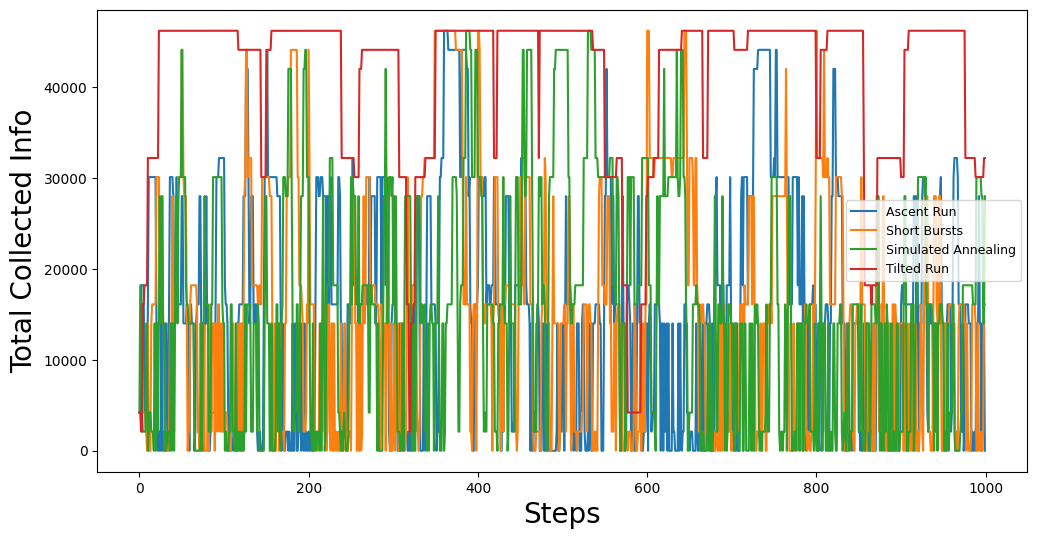

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(scores_as, label="Ascent Run")
plt.plot(scores_sb, label="Short Bursts")
plt.plot(scores_anneal, label="Simulated Annealing")
plt.plot(scores_tilt, label="Tilted Run")
plt.xlabel("Steps", fontsize=20)
plt.ylabel("Total Collected Info", fontsize=20)
plt.legend(fontsize=9)
plt.show()

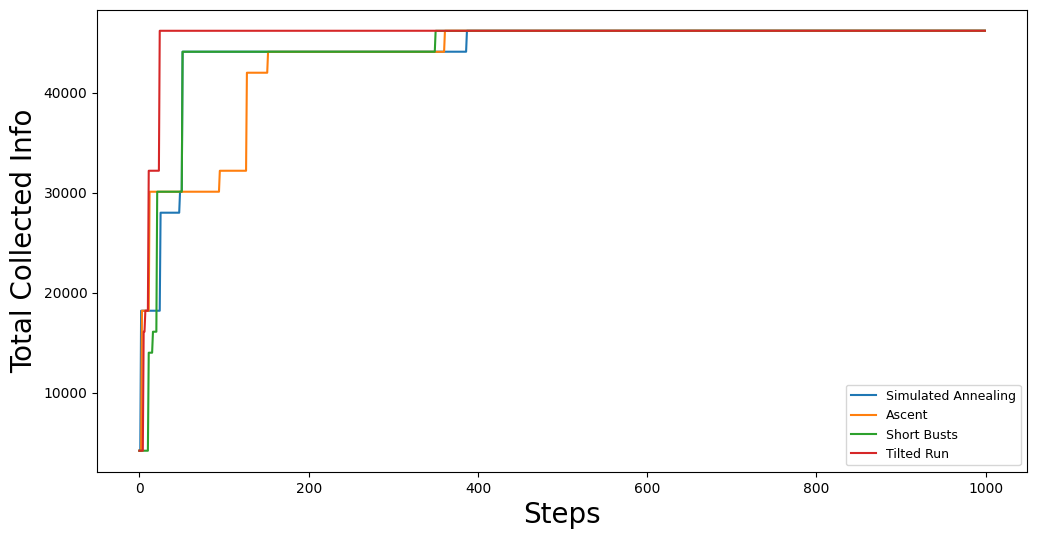

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

plt.plot(max_scores_anneal, label="Simulated Annealing")
plt.plot(max_scores_as, label="Ascent")
plt.plot(max_scores_sb, label="Short Busts")
plt.plot(max_scores_tilt, label="Tilted Run")

plt.xlabel("Steps", fontsize=20)
plt.ylabel("Total Collected Info", fontsize=20)
plt.legend(fontsize=9)
plt.show()

In [10]:
print("Best Objective Values")
print("Annealing", max(max_scores_anneal))
print("Ascent", max(max_scores_as))
print("Shorts Busts", max(max_scores_sb))
print("Tilted", max(max_scores_tilt))

Best Objective Values
Annealing 46181.412449760166
Ascent 46176.33711486734
Shorts Busts 46188.34766045987
Tilted 46188.39387745022


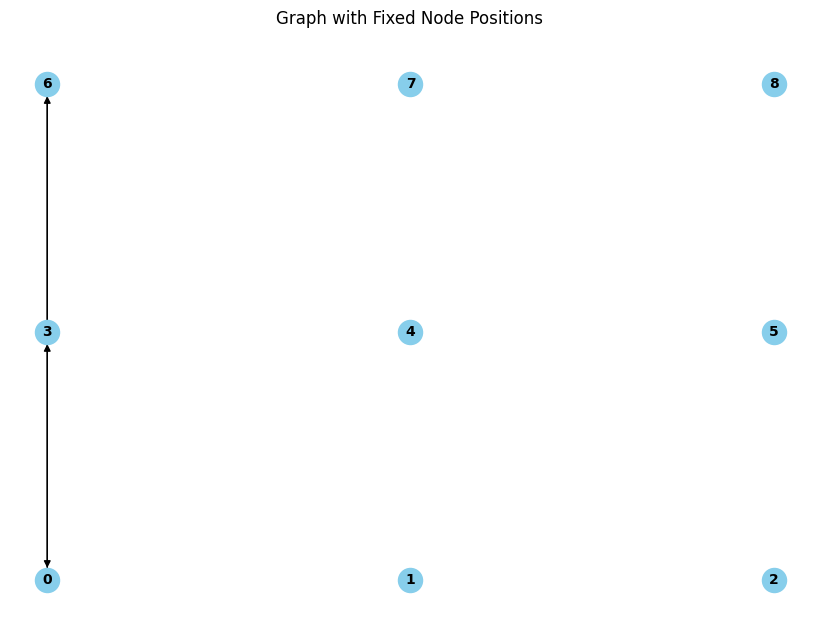

In [ ]:
from uav_routing.environment.plot import plot_graph_with_positions
import networkx as nx
plot_graph_with_positions(state.nodes, list(state.tour.edges))

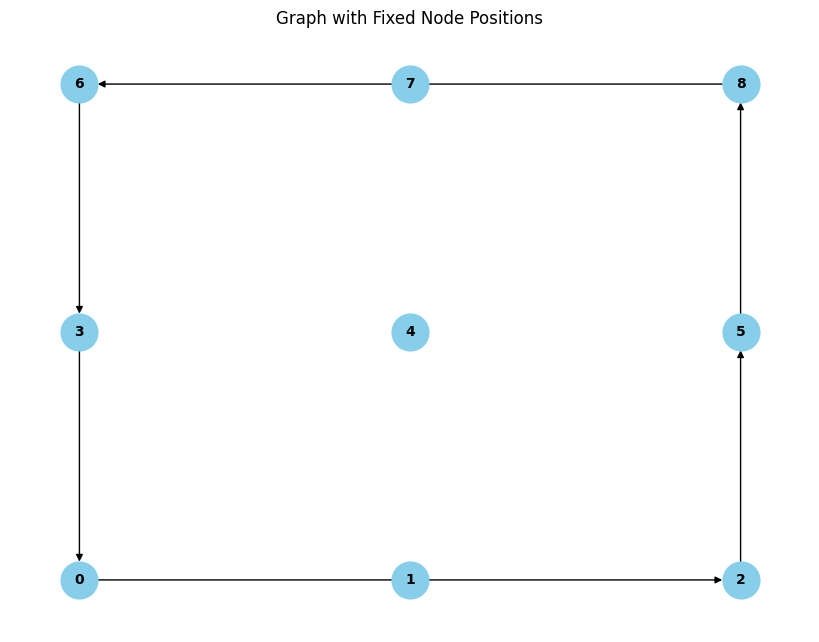

In [ ]:

plot_graph_with_positions(nodes, list(T.edges))

# Geometric Plot

In [ ]:
"""
%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

import pandas as pd

import matplotlib.cm as mcm
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output

frames = []
district_data = []

for i, partition in enumerate(recom_chain):
    for district_name in partition.perimeter.keys():
        population = partition.population[district_name]
        perimeter = partition.perimeter[district_name]
        area = partition.area[district_name]
        district_data.append((i, district_name, population, perimeter, area))

    buffer = io.BytesIO()
    fig, ax = plt.subplots(figsize=(10,10))
    partition.plot(ax=ax, cmap='tab20')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image = Image.open(buffer)
    frames.append(image)
    plt.close(fig)

df = pd.DataFrame(
    district_data,
    columns=[
        'step',
        'district_name',
        'population',
        'perimeter',
        'area'
    ))
    
def show_frame(idx):
    clear_output(wait=True)
    display(frames[idx])

slider = widgets.IntSlider(value=0, min=0, max=len(frames)-1, step=1, description='Frame:')
slider.layout.width = '500px'
widgets.interactive(show_frame, idx=slider)"""